<a href="https://colab.research.google.com/github/ksejull/labs/blob/main/%D0%9B%D0%A05-6_%D0%9B%D1%83%D1%87%D0%B0%D0%BD%D1%96%D0%BD%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лучанінова Ксенія, Варіант 11, Група 2-8

#Лабораторна робота №5


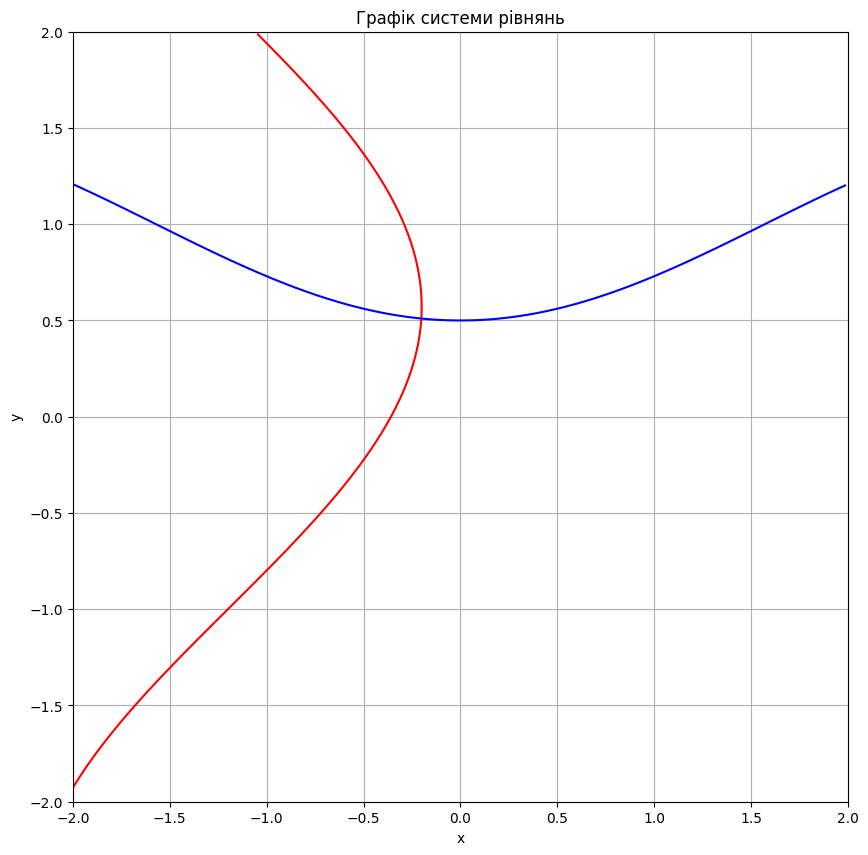

Проста ітерація:
x = -0.20004596075901926 
y = 0.5102170829878478 
Кількість ітерацій = 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Область значень для x та y
x_min, x_max = -2, 2
y_min, y_max = -2, 2
step = 0.01

# Створення масива значень x та y
x, y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Рівняння системи
eq1 = np.sin(y + 1) - x - 1.2
eq2 = 2*y + np.cos(x) - 2

# Створення графіка
fig, ax = plt.subplots(figsize=(10, 10))

# Додавання графіка першого рівняння
ax.contour(x, y, eq1, levels=[0], colors='red')

# Додавання графіка другого рівняння
ax.contour(x, y, eq2, levels=[0], colors='blue')

# Налаштування графіка
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь')

plt.grid(True)

# Відображення графіка
plt.show()

# Метод простої ітерації для уточнення коренів
def f1(y):
    return math.sin(y + 1) - 1.2

def f2(x):
    return 0.5 * (2 - math.cos(x))

def iter(x, y, e):
    xn = x
    yn = y
    xn1 = f1(yn)
    yn1 = f2(xn)
    n = 1
    while ((abs(xn1 - xn) >= e) & (abs(yn1 - yn) >= e)):
        xn = xn1
        yn = yn1
        xn1 = f1(yn)
        yn1 = f2(xn)
        n += 1
    print('Проста ітерація:')
    print('x =', xn, '\ny =', yn, '\nКількість ітерацій =', n)

# Початкове наближення (приблизно з графіка)
x0 = 0.5
y0 = 0.5
delta = 0.001

# Уточнення коренів
iter(x0, y0, delta)


Лучанінова Ксенія, Варіант 11, Група 2-8

#Лабораторна робота №6

Значення функції у точці x = -0.5 приблизно дорівнює -5.625
Значення функції у точці x = 1.5 приблизно дорівнює 2.875
Значення функції у точці x = 2 приблизно дорівнює 10.0
Значення функції у точці x = 2.5 приблизно дорівнює 17.625


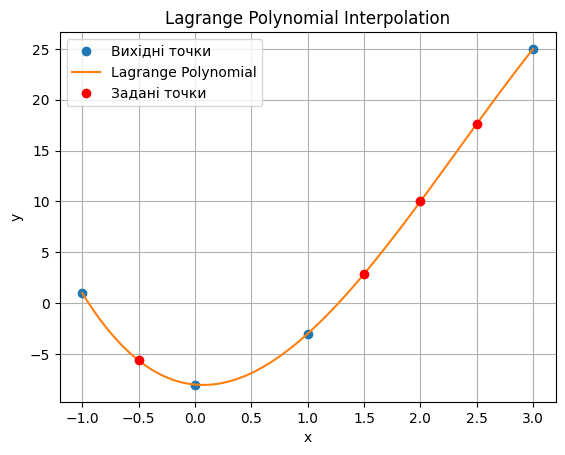

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Задана таблиця значень функції
x = np.array([-1, 0, 1, 3], dtype=float)
y = np.array([1, -8, -3, 25], dtype=float)

# Задані точки, в яких потрібно обчислити значення
points = [-0.5, 1.5, 2, 2.5]

# Функція інтерполяції Лагранжа
def lagrange_interpolation(x, y, x_test):
    n = len(x)
    p = np.zeros(n)
    for i in range(n):
        p_i = 1
        for j in range(n):
            if i != j:
                p_i *= (x_test - x[j]) / (x[i] - x[j])
        p[i] = p_i
    return np.dot(y, p)

# Обчислення значень у заданих точках
values = [lagrange_interpolation(x, y, p) for p in points]

# Виведення результатів
for p, v in zip(points, values):
    print(f"Значення функції у точці x = {p} приблизно дорівнює {v.round(4)}")

# Точки для побудови графіку
xnew = np.linspace(np.min(x), np.max(x), 100)
ynew = [lagrange_interpolation(x, y, i) for i in xnew]

# Побудова графіку інтерполяції
plt.plot(x, y, 'o', label='Вихідні точки')
plt.plot(xnew, ynew, label='Lagrange Polynomial')
plt.plot(points, values, 'ro', label='Задані точки')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial Interpolation')
plt.grid(True)
plt.legend()
plt.show()


Значення функції у точці x = -0.5 (scipy) приблизно дорівнює -5.625
Значення функції у точці x = 1.5 (scipy) приблизно дорівнює 2.875
Значення функції у точці x = 2 (scipy) приблизно дорівнює 10.0
Значення функції у точці x = 2.5 (scipy) приблизно дорівнює 17.625


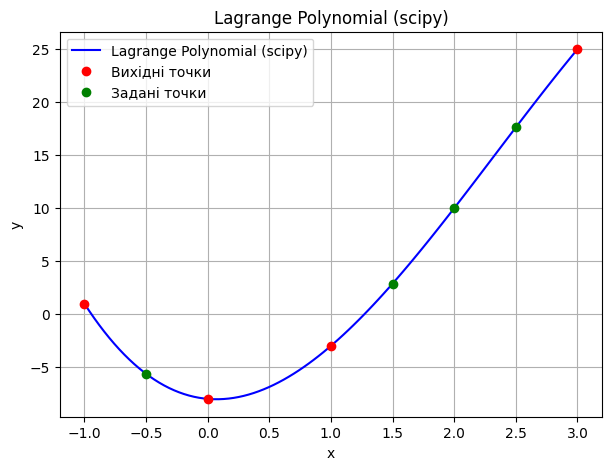

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Задана таблиця значень функції
x = np.array([-1, 0, 1, 3], dtype=float)
y = np.array([1, -8, -3, 25], dtype=float)

# Задані точки, в яких потрібно обчислити значення
points = [-0.5, 1.5, 2, 2.5]

# Побудова інтерполяційного багаточлена за допомогою scipy.interpolate.lagrange
f = lagrange(x, y)

# Обчислення значень у заданих точках за допомогою багаточлена з scipy
values_scipy = [f(p) for p in points]

# Виведення результатів для перевірки
for p, v in zip(points, values_scipy):
    print(f"Значення функції у точці x = {p} (scipy) приблизно дорівнює {v.round(4)}")

# Побудова графіку інтерполяційного багаточлена та вихідних точок
xnew = np.linspace(np.min(x), np.max(x), 100)
fig = plt.figure(figsize=(7, 5))
plt.plot(xnew, f(xnew), 'b', label='Lagrange Polynomial (scipy)')
plt.plot(x, y, 'ro', label='Вихідні точки')
plt.plot(points, values_scipy, 'go', label='Задані точки')
plt.title('Lagrange Polynomial (scipy)')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
